# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import requests
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
#from config import api_key
#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [29]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#query_url = url + "api-key=" + api_key + "&q=" + query
# For each city name in cities list, do below things...
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 0

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")
print("Data Retrieval Complete")

Processing Record 1 of Set 0 : mount gambier
Processing Record 2 of Set 0 : acapulco
Processing Record 3 of Set 0 : lander
Processing Record 4 of Set 0 : torbay
Processing Record 5 of Set 0 : cape town
City not found. Skipping...
Processing Record 6 of Set 0 : mataura
Processing Record 7 of Set 0 : cap malheureux
Processing Record 8 of Set 0 : palana
Processing Record 9 of Set 0 : erzurum
Processing Record 10 of Set 0 : bredasdorp
Processing Record 11 of Set 0 : port hedland
Processing Record 12 of Set 0 : tigil
Processing Record 13 of Set 0 : ushuaia
Processing Record 14 of Set 0 : aasiaat
Processing Record 15 of Set 0 : caceres
Processing Record 16 of Set 0 : kaihua
Processing Record 17 of Set 0 : aklavik
Processing Record 18 of Set 0 : muisne
City not found. Skipping...
Processing Record 19 of Set 0 : tupik
Processing Record 20 of Set 0 : riyadh
Processing Record 21 of Set 0 : svetlogorsk
Processing Record 22 of Set 0 : xichang
City not found. Skipping...
Processing Record 23 of Set

Processing Record 34 of Set 3 : hami
Processing Record 35 of Set 3 : zhigansk
Processing Record 36 of Set 3 : niamey
Processing Record 37 of Set 3 : caravelas
City not found. Skipping...
Processing Record 38 of Set 3 : athmallik
Processing Record 39 of Set 3 : viedma
Processing Record 40 of Set 3 : ayan
Processing Record 41 of Set 3 : gotsu
Processing Record 42 of Set 3 : tawala
Processing Record 43 of Set 3 : tuatapere
Processing Record 44 of Set 3 : lebu
Processing Record 45 of Set 3 : plougastel-daoulas
Processing Record 46 of Set 3 : nuuk
Processing Record 47 of Set 3 : fez
Processing Record 48 of Set 3 : esmeraldas
Processing Record 49 of Set 3 : boyle
Processing Record 50 of Set 3 : banda aceh
Processing Record 0 of Set 4 : georgetown
Processing Record 1 of Set 4 : oudtshoorn
Processing Record 2 of Set 4 : shenjiamen
Processing Record 3 of Set 4 : tosya
Processing Record 4 of Set 4 : najran
Processing Record 5 of Set 4 : santa rosa
Processing Record 6 of Set 4 : kavaratti
Process

Processing Record 21 of Set 7 : carlyle
Processing Record 22 of Set 7 : tolmezzo
Processing Record 23 of Set 7 : tevaitoa
Processing Record 24 of Set 7 : yerbogachen
Processing Record 25 of Set 7 : teodoro sampaio
City not found. Skipping...
Processing Record 26 of Set 7 : nantucket
Processing Record 27 of Set 7 : gaoua
Processing Record 28 of Set 7 : baykit
Processing Record 29 of Set 7 : opoczno
City not found. Skipping...
Processing Record 30 of Set 7 : tambovka
Processing Record 31 of Set 7 : eskil
Processing Record 32 of Set 7 : sao felix do xingu
City not found. Skipping...
Processing Record 33 of Set 7 : ukiah
Processing Record 34 of Set 7 : tezu
Processing Record 35 of Set 7 : avera
Processing Record 36 of Set 7 : anadyr
Processing Record 37 of Set 7 : monywa
City not found. Skipping...
Processing Record 38 of Set 7 : linxia
Processing Record 39 of Set 7 : bilibino
Processing Record 40 of Set 7 : thunder bay
Processing Record 41 of Set 7 : hirara
Processing Record 42 of Set 7 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
weather_dict = { 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list, 
                "Country" : country_list,
                "Date" : date_list,
}
                               


In [32]:
cities_weather_df=pd.DataFrame(weather_dict)

In [33]:
cities_weather_df.to_csv('city_weather.csv')
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mount Gambier,-37.8333,140.7667,67.91,52,100,18.41,AU,1645329489
1,Acapulco de Juárez,16.8634,-99.8901,77.99,68,3,6.04,MX,1645329489
2,Lander,42.8330,-108.7307,35.98,52,0,6.51,US,1645329489
3,Torbay,47.6666,-52.7314,26.98,78,100,16.11,CA,1645329490
4,Cape Town,-33.9258,18.4232,63.27,81,20,4.61,ZA,1645329490
...,...,...,...,...,...,...,...,...,...
558,Isla Mujeres,21.2311,-86.7310,75.16,76,0,14.29,MX,1645329615
559,Leshukonskoye,64.8989,45.7622,25.70,96,100,5.99,RU,1645329734
560,Kamina,-8.7386,24.9906,62.20,98,100,3.24,CD,1645329734
561,Mineiros,-17.5694,-52.5511,64.92,96,46,5.41,BR,1645329735


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

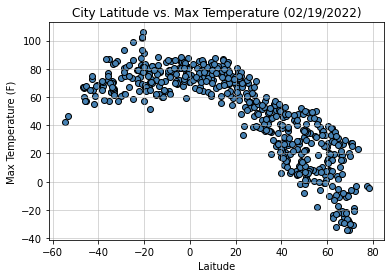

In [34]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (02/19/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

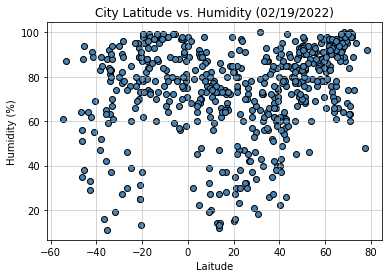

In [35]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (02/19/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

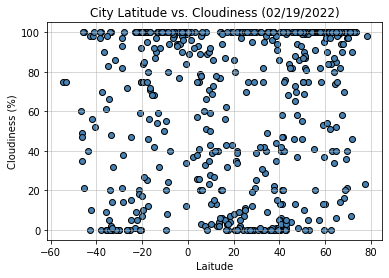

In [36]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (02/19/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

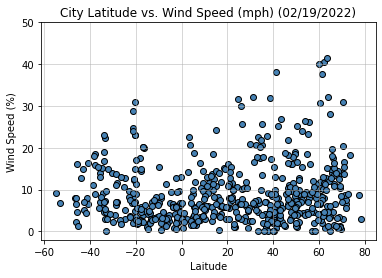

In [37]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (02/19/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [45]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] >= 0]
southern_hemisphere = cities_weather_df.loc[cities_weather_df["Lat"] < 0]

# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.87


Text(0, 0.5, 'Max Temp (F)')

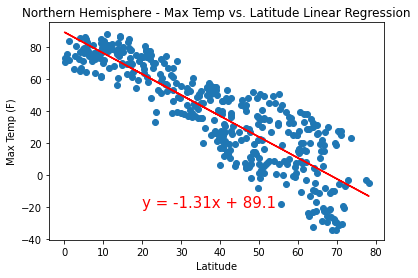

In [63]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"],northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 20, -20)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")


# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.37


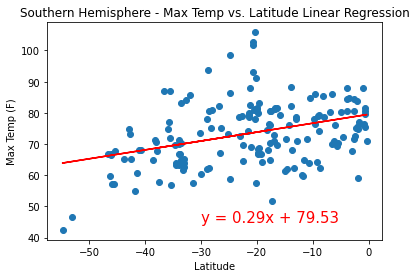

In [67]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 45)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41


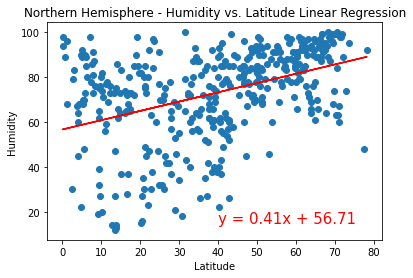

In [71]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.33


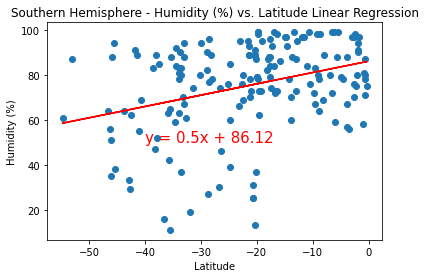

In [47]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29


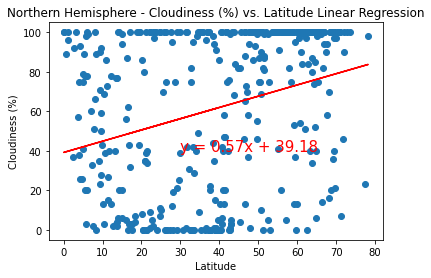

In [48]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.34


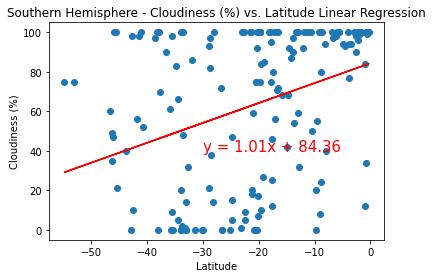

In [49]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


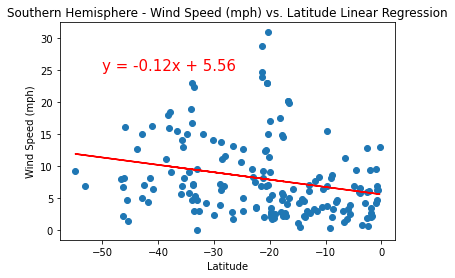

In [72]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -50, 25)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


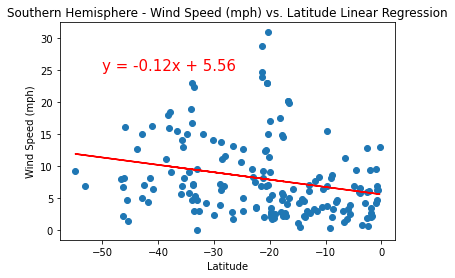

In [73]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -50, 25)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")